In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import os
import spacy
import numpy as np
import matplotlib.pyplot as plt
# Initialize spacy 'en' model, keeping only tagger component needed
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
sentiment_analyzer = SentimentIntensityAnalyzer()
from scipy.interpolate import UnivariateSpline

In [63]:
class TextAnalyzer():
    def __init__(self, input_text:str):
        self.input_text = input_text
        self.words_tokenized = None
        self.number_of_characters = len(input_text)
        self.number_of_words = None
        self.av_word_length = None
        self.sent_tokenized = None
        self.number_of_sentences = None
        self.av_sent_length_w = None
        self.paragraphs = None
        self.number_of_paragraphs = None
        self.av_par_length_w = None
        self.av_par_length_sent = None
        self.total_sentiment = None
        self.lemmatized_text = None
        self.unique_words = None
        self.number_of_unique_words = None
        self.extra =[',', '.', ';', ':', '?', '“', '”', '’', '‘', '!', ')', '(', '-', "'", '—', '|', '~', '=', '»', ']', 
                     '&', '\n', '\n\n', '"']
        
    def major_calculator(self):
        lowered_text = self.input_text.lower()
        raw_tokenized = nltk.word_tokenize(lowered_text)
        self.words_tokenized = [word for word in raw_tokenized if word not in self.extra]
        self.number_of_words = len(self.words_tokenized)
        self.av_word_length = self.number_of_characters / self.number_of_words
        self.sent_tokenized = nltk.sent_tokenize(self.input_text)
        self.number_of_sentences = len(self.sent_tokenized)
        self.av_sent_length_w = self.number_of_words / self.number_of_sentences
        self.paragraphs = self.input_text.split('\n')
        self.number_of_paragraphs = len(self.paragraphs)
        self.av_par_length_w = self.number_of_words / self.number_of_paragraphs
        self.av_par_length_sent = self.number_of_sentences / self.number_of_paragraphs
        self.total_sentiment = sentiment_analyzer.polarity_scores(self.input_text)
        prelemmatized_text = nlp(self.input_text.lower())
        lemmatized_text_raw = [token.lemma_ for token in prelemmatized_text]
        self.lemmatized_text = [token for token in lemmatized_text_raw if token not in self.extra]
        self.unique_words = set(self.lemmatized_text)
        self.number_of_unique_words = len(self.unique_words)
        return
        
    def text_words_tokenized(self):
        if self.words_tokenized == None:
            self.major_calculator()
        return self.words_tokenized

    def text_number_of_words(self):
        if self.number_of_words == None:
            self.major_calculator()
        return self.number_of_words
    
    def text_av_word_length(self):
        if self.av_word_length == None:
            self.major_calculator()
        return self.av_word_length
    
    def text_sent_tokenized(self):
        if self.sent_tokenized == None:
            self.major_calculator()
        return self.sent_tokenized

    def text_number_of_sentences(self):
        if self.number_of_sentences == None:
            self.major_calculator()
        return self.number_of_sentences
    
    def text_av_sent_length_w(self):
        if self.av_sent_length_w == None:
            self.major_calculator()
        return self.av_sent_length_w
    
    def text_paragraphs(self):
        if self.paragraphs == None:
            self.major_calculator()
        return self.paragraphs
    

    def text_number_of_paragraphs(self):
        if self.number_of_paragraphs == None:
            self.major_calculator()
        return self.number_of_paragraphs
    
    def text_av_par_length_w(self):
        if self.av_par_length_w == None:
            self.major_calculator()
        return self.av_par_length_w
    
    def text_av_par_length_sent(self):
        if self.av_par_length_sent == None:
            self.major_calculator()
        return self.av_par_length_sent
    
    def text_total_sentiment(self):
        if self.total_sentiment == None:
            self.major_calculator()
        return self.total_sentiment

    def text_lemmatization(self):
        if self.lemmatized_text == None:
            self.major_calculator()
        return self.lemmatized_text

    def text_unique_words(self):
        if self.unique_words == None:
            self.major_calculator()
        return self.unique_words

    def text_number_of_unique_words(self):
        if self.number_of_unique_words == None:
            self.major_calculator()
        return self.number_of_unique_words
    
    def text_sentiplot(self, parameter: float or int): # graph of sentiment by sentences with spline smoothening data
        # but this methodis not good
        self.major_calculator()
        pre_sentiments = [sentiment_analyzer.polarity_scores(sent)['compound'] for sent in self.sent_tokenized]
        sentiments = np.array(pre_sentiments)
        sent_num = np.array([i for i in range(1, len(sentiments)+1)])
        spline = UnivariateSpline(sent_num, sentiments, s=parameter) 
        sent_num_new = np.linspace(min(sent_num), max(sent_num), len(self.sent_tokenized)*300)
        sentiments_new = spline(sent_num_new)

        #fig, ax = plt.subplots()
        #ax.plot(sent_num, sentiments, color='grey')
        #ax.plot(sent_num_new, sentiments_new)
        #ax.margins(x=0)
        #ax.set_title(f"""Degree of sentiment """)
        #ax.set_xlabel('Index of sentence')
        #ax.set_ylabel('Value of sentiment')
        
        #fig, ax = plt.subplots()
        #ax.plot(sent_num_new, sentiments_new)
        #ax.margins(x=0)
        #ax.set_title(f"""Spline smoothened sentiment""")
        #ax.set_xlabel('Index of sentence')
        #ax.set_ylabel('Value of sentiment')
        #plt.show()
        return sent_num_new, sentiments_new
        




 


In [54]:
def metrics(input_text:str):
    text = TextAnalyzer(input_text)
    sentiment = text.text_total_sentiment()
    return [text.text_number_of_words(), text.text_number_of_sentences(), text.text_number_of_unique_words(),
    text.text_number_of_paragraphs(), text.text_av_word_length(), text.text_av_sent_length_w(), text.text_av_par_length_sent(),
    text.text_av_par_length_w(), sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound'] ]


In [64]:
titles = os.listdir('/Users/artem/Documents/my python projects/Mollie Panter-Downes/Good Evening, Mrs. Craven texts')
ordered_titles = sorted(titles, key=lambda t: int(t.split('. ')[0]))
all_texts_as_str = []

for title in ordered_titles:
    f = open (f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8')
    short_story = f.read()
    all_texts_as_str.append(short_story)
    
    f.close()


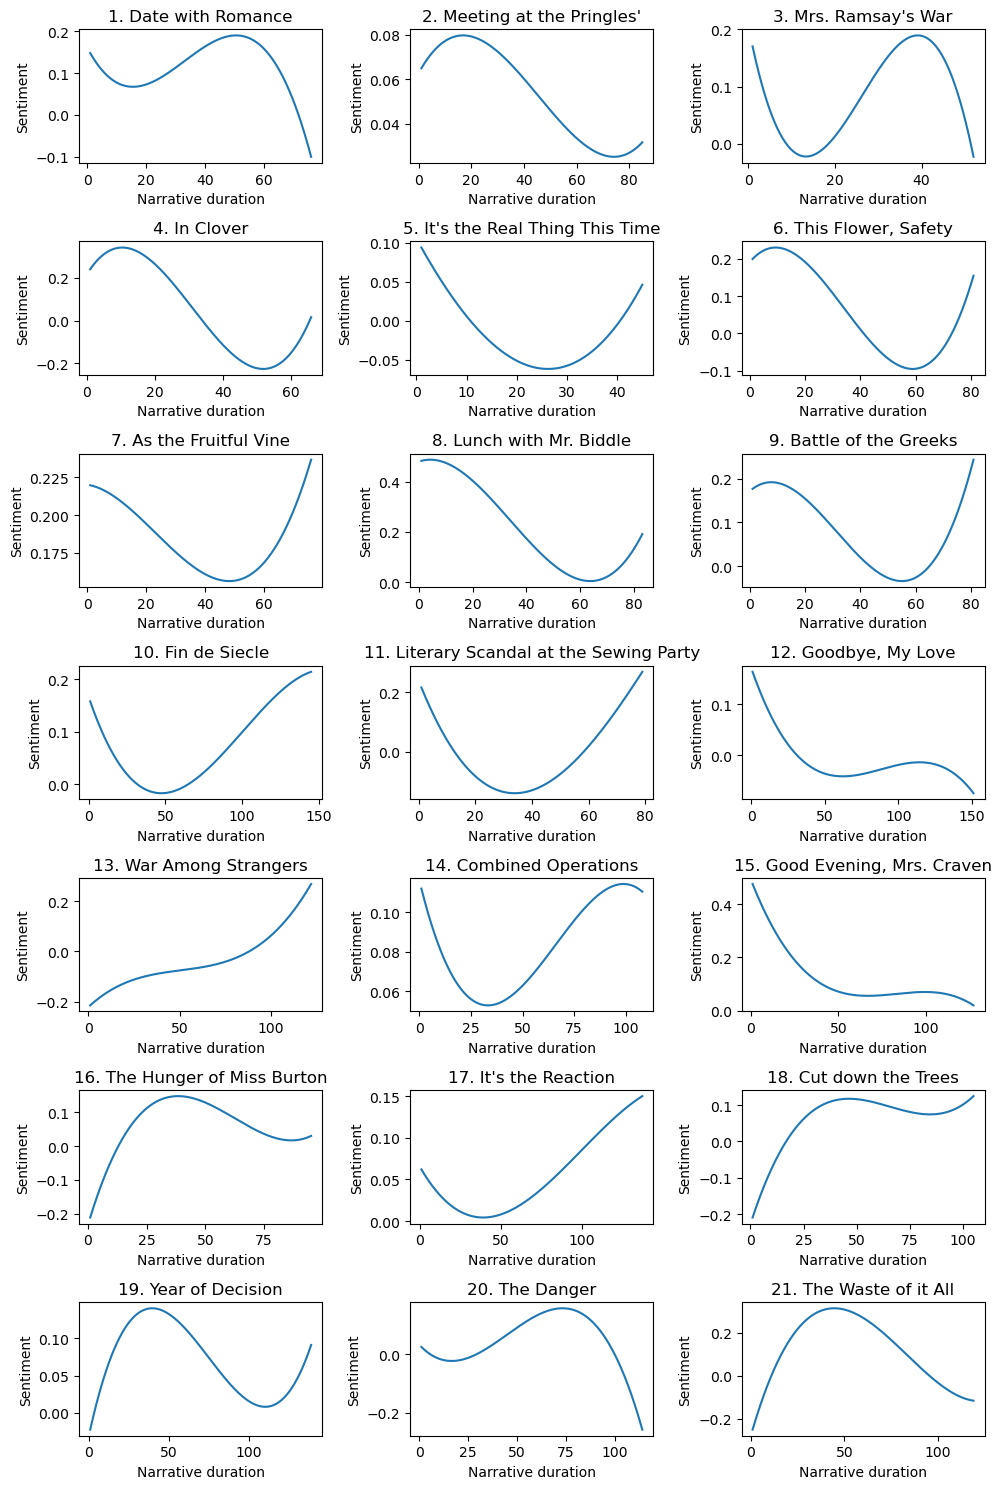

In [72]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(10, 15))  # figsize is adjusted for visibility
counter = 0
for row in axes:
    for ax in row:
        story = TextAnalyzer(all_texts_as_str[counter])
        data = story.text_sentiplot(30)
        ax.plot(data[0], data[1])
        ax.set_title(f'{ordered_titles[counter][:-4]}')
        ax.set_xlabel('Narrative duration')
        ax.set_ylabel('Sentiment')
        counter += 1
    counter = counter
    

plt.tight_layout()
plt.savefig('sentiment of all stories.svg')
plt.show()

In [56]:
with open ('Good Evening, Mrs. Craven texts/1. Date with Romance.txt', encoding='utf-8') as f:
    text = f.read()
sentiment = sentiment_analyzer.polarity_scores(text)
sentiment

{'neg': 0.057, 'neu': 0.825, 'pos': 0.118, 'compound': 0.9978}

In [58]:
 def text_words_tokenized(self):
        lowered_text = self.input_text.lower()
        raw_tokenized = nltk.word_tokenize(lowered_text)
        self.words_tokenized = [word for word in raw_tokenized if word not in self.extra]
        return self.words_tokenized

    def text_number_of_words(self):
        self.text_words_tokenized ()
        self.number_of_words = len(self.words_tokenized)
        return self.number_of_words
    
    def text_av_word_length(self):
        self.text_
        pass
    
    def text_sent_tokenized(self):
        self.sent_tokenized = nltk.sent_tokenize(self.input_text)
        return self.sent_tokenized

    def text_number_of_sentences(self):
        self.text_sent_tokenized()
        self.number_of_sentences = len(self.sent_tokenized)
        return self.number_of_sentences

    def number_of_paragraphs(self):
        pass

    

    def av_sent_length_w(self):
        pass

    def av_sent_length_ch(self):
        pass

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)